In [3]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing Data
dataset1 = pd.read_csv(r'amazonTop1ReadyForML.csv')
dataset1 = dataset1.set_index('date')

In [5]:
# Removing the first 7 days from the data set
dataset1 = dataset1.iloc[7:,:]
dataset1

,Profit_OMR-BP742N,Avg. return on sales_OMR-BP742N,7dayRosAverage,7dayRosAverage*100,Distinct count of order id_OMR-BP742N,quantity_OMR-BP742N,7DaySumOfQTY,profitPerQuantitySold_OMR-BP742N,profitPerOrderMade_OMR-BP742N,net32Top1ItemAvg.weeklyReturn,net32Top1ItemAvg.weeklyReturn*100,Prediction_OMR-BP742N
date,,,,,,,,,,,,
2019-01-08,130,0.3181,0.2773,277.0,6,6,46.0,22,22,0.108100,108.0,1.0
2019-01-09,65,0.3181,0.3227,323.0,3,3,52.0,22,22,0.214100,214.0,1.0
2019-01-10,65,0.3181,0.3232,323.0,3,3,48.0,22,22,0.320100,320.0,1.0
2019-01-11,51,0.3519,0.3214,321.0,2,2,40.0,25,25,0.426100,426.0,0.0
2019-01-12,0,0.0000,0.3244,324.0,0,0,36.0,0,0,0.532100,532.0,0.0
2019-01-13,0,0.0000,0.2772,277.0,0,0,35.0,0,0,0.532100,532.0,0.0
2019-01-14,43,0.3181,0.2306,231.0,2,2,32.0,22,22,0.532100,532.0,0.0
2019-01-15,0,0.0000,0.2320,232.0,0,0,16.0,0,0,0.424000,424.0,0.0
2019-01-16,0,0.0000,0.1866,187.0,0,0,10.0,0,0,0.424000,424.0,0.0


In [6]:
for i in dataset1.columns:
    if i == '7dayRosAverage'   or i == 'Avg. return on sales_OMR-BP742N'\
    or i == 'net32Top1ItemAvg.weeklyReturn' :
        continue
    dataset1[f"{i}"] = dataset1[f"{i}"].astype(np.int64) 

In [7]:
X = dataset1.iloc[:,[0,6]].values
y = dataset1.iloc[:,-1].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42) 
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1
 0 0]
[0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 0 0]


In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[43, 11],
       [ 6, 16]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


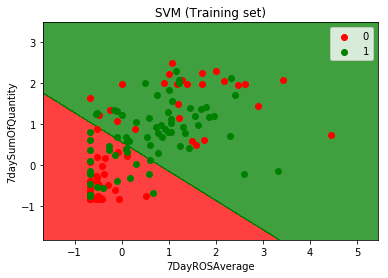

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('7DayROSAverage')
plt.ylabel('7daySumOfQuantity')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


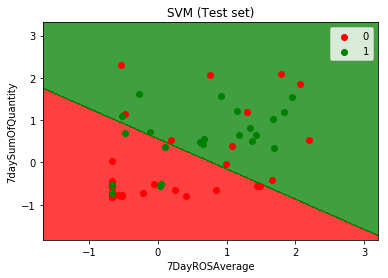

In [14]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('7DayROSAverage')
plt.ylabel('7daySumOfQuantity')
plt.legend()
plt.show()